In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.misc import derivative

In [2]:
from poincaresphere import *

In [3]:
b=PoincareSphere()

In [43]:
def jones2stokes( jvec ):
    try:
        j1, j2 = jvec
        #print j1,j2
    except:
        print "Input jvec not 2-element iterable"
        return 0
    I = abs(j1)**2 + abs(j2)**2
    Q = abs(j1)**2 - abs(j2)**2
    U = 2.0*real((j1 * j2.conjugate() ))
    V = 2.0*imag((j1 * j2.conjugate() ))
    print "Stokes vec ",I,Q,U,V
    return( [I,Q,U,V] )

In [25]:
#
# test the waveplate for some simple cases
#LHPjones =  asarray([ [1] ,[ 0] ] ,complex)
#LVPjones = asarray([ [0] , [1 ]] ,complex)
#LP45jones = asarray([ [.7071] ,[.7071] ] ,complex)
#LN45jones = asarray([[ .7071] ,[-.7071] ],complex)
#LCPjones = asarray([ [.7071] ,[0.7071j] ] ,complex)
#RCPjones = asarray([ [.7071] ,[-0.7071j] ] ,complex)
root2over2 = sqrt(2)/2
LHPjones =  asarray([ [1] ,[0]] ,complex)
LVPjones = asarray([ [0] , [1]] ,complex)
LP45jones = asarray([ [root2over2] , [root2over2] ] ,complex)
LN45jones = asarray([ [root2over2] , [-root2over2] ],complex)
LCPjones = asarray([ [root2over2] , [root2over2*1.0j] ] ,complex)
RCPjones = asarray([ [root2over2] , [-root2over2*1.0j] ] ,complex)

In [149]:
#
# function to produce a waveplate at given fast axis orientation angle relative to x-axis
#
#def rotated_waveplate( theta, retardance ):
#    sinv = sin(theta)
#    sin2v = sinv*sinv
#    cosv = cos(theta)
#    cos2v = cosv*cosv
#    retsincos = -retardance*sinv*cosv
#    Z =  asarray( [ [ cos2v + retardance*sin2v , retsincos ] , [ retsincos , sin2v + retardance*cos2v ] ], complex) 
#    return( Z )
def rotated_waveplate( theta, retardance ):
    sinv = sin(theta)
    sin2v = sinv*sinv
    cosv = cos(theta)
    cos2v = cosv*cosv
    Z =  asarray( [ [ retardance[0]*cos2v + retardance[1]*sin2v , (retardance[0]-retardance[1])*sinv*cosv ] , [ (retardance[0]-retardance[1])*sinv*cosv ,  retardance[0]*sin2v + retardance[1]*cos2v ] ], complex) 
    return( Z )
#
# define retardance constants for an arbitrary waveplate
# circularity = pi/2 = quarter wave plate
# circularity = pi = half wave plate
# circularity = phi_y - phi_x
# set phi_x = 0
#def retardance_constant( circularity ):
#    e_iphi_y = exp(1.0j*circularity)
#    return e_iphi_y
def retardance_constant( phi ):
    e_iphi_x = exp(1.0j*phi*0.5)
    e_iphi_y = exp(1.0j*phi*(-0.5)) 
    return [e_iphi_x,e_iphi_y]


In [150]:
phi = linspace( -pi, pi, 33 )
retardances = retardance_constant( phi )

In [151]:
thetas = linspace( 0, 2*pi, 33 )
jones_mats = rotated_waveplate(thetas, retardance_constant( pi/2 ))

In [152]:
print  retardance_constant( pi/2 )

[(0.70710678118654757+0.70710678118654746j), (0.70710678118654757-0.70710678118654746j)]


In [153]:
LHPplateout = np.dot( jones_mats[:,:,0],LHPjones )
LVPplateout = np.dot( jones_mats[:,:,0],LVPjones )
LP45plateout = np.dot( jones_mats[:,:,0],LP45jones )
LN45plateout = np.dot( jones_mats[:,:,0],LN45jones )
LCPplateout = np.dot( jones_mats[:,:,0],LCPjones )
RCPplateout = np.dot( jones_mats[:,:,0],RCPjones )

In [147]:
print jones_mats[0]

[[  7.07106781e-01 +7.07106781e-01j   6.53281482e-01 +6.53281482e-01j
    5.00000000e-01 +5.00000000e-01j   2.70598050e-01 +2.70598050e-01j
    1.11022302e-16 +1.11022302e-16j  -2.70598050e-01 -2.70598050e-01j
   -5.00000000e-01 -5.00000000e-01j  -6.53281482e-01 -6.53281482e-01j
   -7.07106781e-01 -7.07106781e-01j  -6.53281482e-01 -6.53281482e-01j
   -5.00000000e-01 -5.00000000e-01j  -2.70598050e-01 -2.70598050e-01j
   -1.11022302e-16 -1.11022302e-16j   2.70598050e-01 +2.70598050e-01j
    5.00000000e-01 +5.00000000e-01j   6.53281482e-01 +6.53281482e-01j
    7.07106781e-01 +7.07106781e-01j   6.53281482e-01 +6.53281482e-01j
    5.00000000e-01 +5.00000000e-01j   2.70598050e-01 +2.70598050e-01j
    2.22044605e-16 +2.22044605e-16j  -2.70598050e-01 -2.70598050e-01j
   -5.00000000e-01 -5.00000000e-01j  -6.53281482e-01 -6.53281482e-01j
   -7.07106781e-01 -7.07106781e-01j  -6.53281482e-01 -6.53281482e-01j
   -5.00000000e-01 -5.00000000e-01j  -2.70598050e-01 -2.70598050e-01j
   -3.33066907e-16 -

Stokes vec  [ 1.] [ 1.] [ 0.] [ 0.]
Stokes vec  [ 1.] [ 1.] [ 0.] [ 0.]


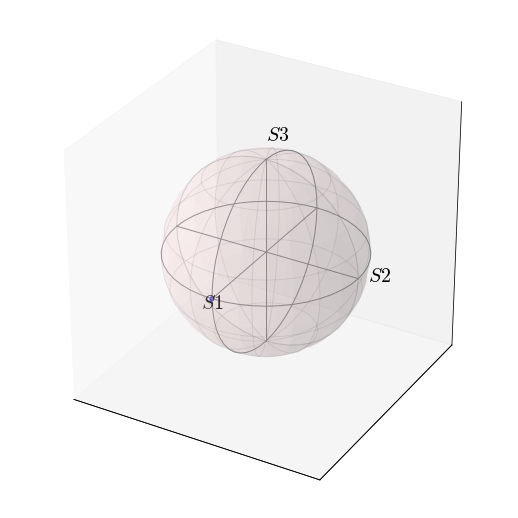

In [154]:
LHPstokes = jones2stokes(LHPjones)
LHPplateoutstokes = jones2stokes(LHPplateout)
b.clear()
b.add_points(LHPstokes[1:],LHPplateoutstokes[1:])
b.show()

[[ 0.+0.j]
 [ 1.+0.j]]
Stokes vec  [ 1.] [-1.] [ 0.] [ 0.]
Stokes vec  [ 1.] [-1.] [ 0.] [ 0.]


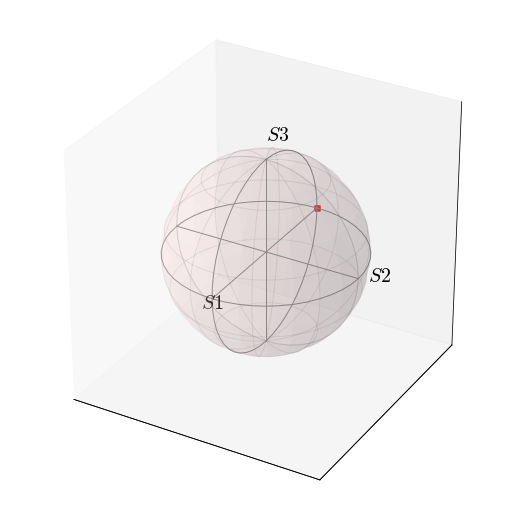

In [155]:
print LVPjones
LVPstokes = jones2stokes(LVPjones)
LVPplateoutstokes = jones2stokes(LVPplateout)
b.clear()
b.add_points(LVPstokes[1:])
b.add_points(LVPplateoutstokes[1:])
b.show()

[[ 0.70710678+0.j]
 [ 0.70710678+0.j]]
Stokes vec  [ 1.] [ 0.] [ 1.] [ 0.]
Stokes vec  [ 1.] [ 0.] [  2.22044605e-16] [ 1.]


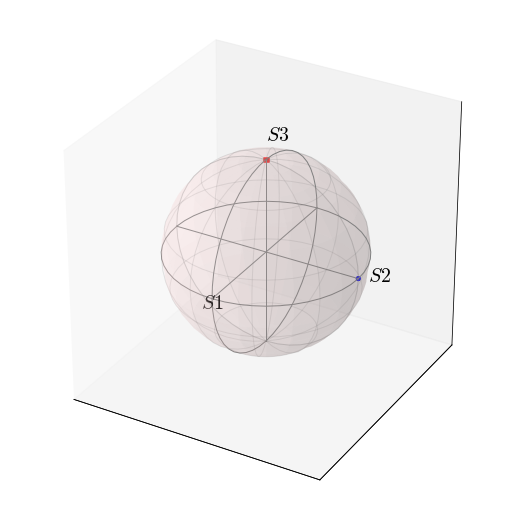

In [156]:
print LP45jones
LP45stokes = jones2stokes(LP45jones)
LP45plateoutstokes = jones2stokes(LP45plateout)
b.clear()
b.add_points(LP45stokes[1:])
b.add_points(LP45plateoutstokes[1:])
b.show()

[[ 0.70710678+0.j]
 [-0.70710678+0.j]]
Stokes vec  [ 1.] [ 0.] [-1.] [-0.]
Stokes vec  [ 1.] [ 0.] [ -2.22044605e-16] [-1.]


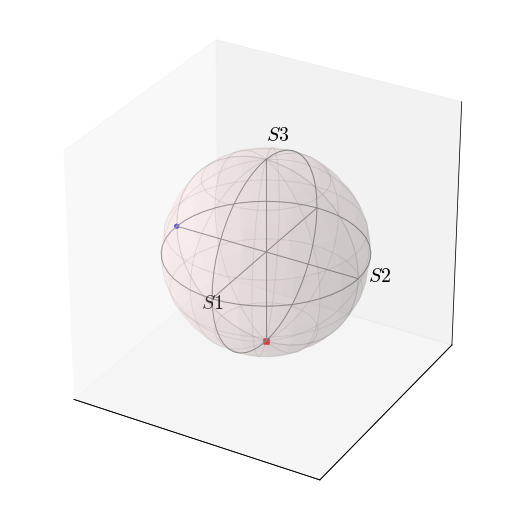

In [157]:
print LN45jones
LN45stokes = jones2stokes(LN45jones)
LN45plateoutstokes = jones2stokes(LN45plateout)
b.clear()
b.add_points(LN45stokes[1:])
b.add_points(LN45plateoutstokes[1:])
b.show()

[[ 0.70710678+0.j        ]
 [ 0.00000000+0.70710678j]]
Stokes vec  [ 1.] [ 0.] [ 0.] [-1.]
Stokes vec  [ 1.] [ 0.] [ 1.] [ -2.22044605e-16]


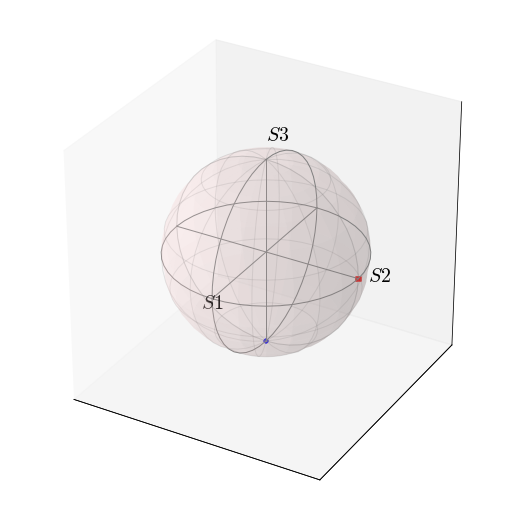

In [158]:
print LCPjones
LCPstokes = jones2stokes(LCPjones)
LCPplateoutstokes = jones2stokes(LCPplateout)
b.clear()
b.add_points(LCPstokes[1:])
b.add_points(LCPplateoutstokes[1:])
b.show()

[[ 0.70710678+0.j        ]
 [-0.00000000-0.70710678j]]
Stokes vec  [ 1.] [ 0.] [-0.] [ 1.]
Stokes vec  [ 1.] [ 0.] [-1.] [  2.22044605e-16]


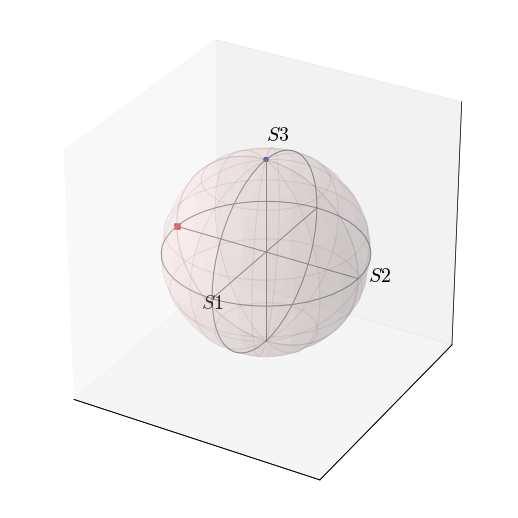

In [159]:
print RCPjones
RCPstokes = jones2stokes(RCPjones)
RCPplateoutstokes = jones2stokes(RCPplateout)
b.clear()
b.add_points(RCPstokes[1:])
b.add_points(RCPplateoutstokes[1:])
b.show()

In [160]:
RCPin_set = np.zeros([ len(jones_mats[0,0,:]),2,1], dtype=complex)
for i in range(len(jones_mats[0,0,:])):
    #RCPin_set[i] = np.dot( jones_mats[:,:,i],RCPjones )
    RCPin_set[i] = np.dot(jones_mats[:,:,i],RCPjones)
#RCPin_stokes = jones2stokes(RCPjones)
#RCPplateoutstokes_set = jones2stokes(RCPin_set)
#b.clear()
#b.add_points(RCPstokes[1:])
#b.add_points(RCPplateoutstokes[1:])
#b.show()

In [161]:
i = 1
print np.dot(jones_mats[:,:,i],RCPjones)

[[ 0.69134172+0.46193977j]
 [-0.46193977-0.30865828j]]


In [162]:
RCPplateoutstokes_set = np.zeros([ len(jones_mats[0,0,:]),4,1], dtype=float)
for i in range(len(jones_mats[0,0,:])):
    RCPplateoutstokes_set[i] = jones2stokes(RCPin_set[i])

Stokes vec  [ 1.] [ 0.] [-1.] [  2.22044605e-16]
Stokes vec  [ 1.] [ 0.38268343] [-0.92387953] [  1.66533454e-16]
Stokes vec  [ 1.] [ 0.70710678] [-0.70710678] [ 0.]
Stokes vec  [ 1.] [ 0.92387953] [-0.38268343] [  1.94289029e-16]
Stokes vec  [ 1.] [ 1.] [ -1.57009246e-16] [  2.22044605e-16]
Stokes vec  [ 1.] [ 0.92387953] [ 0.38268343] [  1.38777878e-16]
Stokes vec  [ 1.] [ 0.70710678] [ 0.70710678] [  2.77555756e-16]
Stokes vec  [ 1.] [ 0.38268343] [ 0.92387953] [  1.11022302e-16]
Stokes vec  [ 1.] [  1.11022302e-16] [ 1.] [  2.22044605e-16]
Stokes vec  [ 1.] [-0.38268343] [ 0.92387953] [  1.66533454e-16]
Stokes vec  [ 1.] [-0.70710678] [ 0.70710678] [ 0.]
Stokes vec  [ 1.] [-0.92387953] [ 0.38268343] [  5.55111512e-17]
Stokes vec  [ 1.] [-1.] [  1.57009246e-16] [  2.22044605e-16]
Stokes vec  [ 1.] [-0.92387953] [-0.38268343] [  1.94289029e-16]
Stokes vec  [ 1.] [-0.70710678] [-0.70710678] [  1.66533454e-16]
Stokes vec  [ 1.] [-0.38268343] [-0.92387953] [ -5.55111512e-17]
Stokes vec 

Stokes vec  [ 1.] [ 0.] [-1.] [  2.22044605e-16]
Stokes vec  [ 1.] [ 0.38268343] [-0.92387953] [  1.66533454e-16]
Stokes vec  [ 1.] [ 0.70710678] [-0.70710678] [ 0.]
Stokes vec  [ 1.] [ 0.92387953] [-0.38268343] [  1.94289029e-16]
Stokes vec  [ 1.] [ 1.] [ -1.57009246e-16] [  2.22044605e-16]
Stokes vec  [ 1.] [ 0.92387953] [ 0.38268343] [  1.38777878e-16]
Stokes vec  [ 1.] [ 0.70710678] [ 0.70710678] [  2.77555756e-16]
Stokes vec  [ 1.] [ 0.38268343] [ 0.92387953] [  1.11022302e-16]
Stokes vec  [ 1.] [  1.11022302e-16] [ 1.] [  2.22044605e-16]
Stokes vec  [ 1.] [-0.38268343] [ 0.92387953] [  1.66533454e-16]
Stokes vec  [ 1.] [-0.70710678] [ 0.70710678] [ 0.]
Stokes vec  [ 1.] [-0.92387953] [ 0.38268343] [  5.55111512e-17]
Stokes vec  [ 1.] [-1.] [  1.57009246e-16] [  2.22044605e-16]
Stokes vec  [ 1.] [-0.92387953] [-0.38268343] [  1.94289029e-16]
Stokes vec  [ 1.] [-0.70710678] [-0.70710678] [  1.66533454e-16]
Stokes vec  [ 1.] [-0.38268343] [-0.92387953] [ -5.55111512e-17]
Stokes vec 

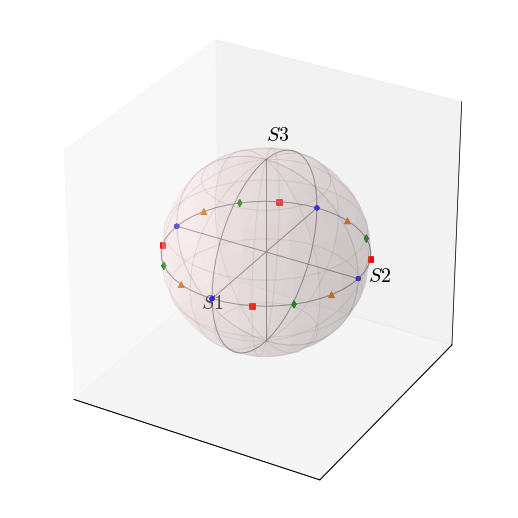

In [170]:
b.clear()
for i in range(len(jones_mats[0,0,:])):
    RCPplateoutstokes_set[i] = jones2stokes(RCPin_set[i])
    b.add_points(RCPplateoutstokes_set[i,1:])
b.show()

In [175]:
LP45in_set = np.zeros([ len(jones_mats[0,0,:]),2,1], dtype=complex)
for i in range(len(jones_mats[0,0,:])):
    LP45in_set[i] = np.dot(jones_mats[:,:,i],LVPjones)


Stokes vec  [ 1.] [-1.] [ 0.] [ 0.]
Stokes vec  [ 1.] [-0.85355339] [-0.35355339] [ 0.38268343]
Stokes vec  [ 1.] [-0.5] [-0.5] [ 0.70710678]
Stokes vec  [ 1.] [-0.14644661] [-0.35355339] [ 0.92387953]
Stokes vec  [ 1.] [ -2.22044605e-16] [ -1.57009246e-16] [ 1.]
Stokes vec  [ 1.] [-0.14644661] [ 0.35355339] [ 0.92387953]
Stokes vec  [ 1.] [-0.5] [ 0.5] [ 0.70710678]
Stokes vec  [ 1.] [-0.85355339] [ 0.35355339] [ 0.38268343]
Stokes vec  [ 1.] [-1.] [  1.22464680e-16] [  1.22464680e-16]
Stokes vec  [ 1.] [-0.85355339] [-0.35355339] [-0.38268343]
Stokes vec  [ 1.] [-0.5] [-0.5] [-0.70710678]
Stokes vec  [ 1.] [-0.14644661] [-0.35355339] [-0.92387953]
Stokes vec  [ 1.] [ -2.22044605e-16] [ -1.57009246e-16] [-1.]
Stokes vec  [ 1.] [-0.14644661] [ 0.35355339] [-0.92387953]
Stokes vec  [ 1.] [-0.5] [ 0.5] [-0.70710678]
Stokes vec  [ 1.] [-0.85355339] [ 0.35355339] [-0.38268343]
Stokes vec  [ 1.] [-1.] [  2.44929360e-16] [ -2.44929360e-16]
Stokes vec  [ 1.] [-0.85355339] [-0.35355339] [ 0.38

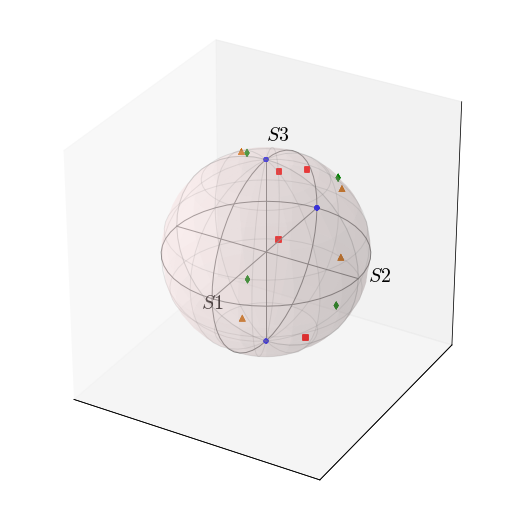

In [176]:
LP45plateoutstokes_set = np.zeros([ len(jones_mats[0,0,:]),4,1], dtype=float)
b.clear()
for i in range(len(jones_mats[0,0,:])):
    LP45plateoutstokes_set[i] = jones2stokes(LP45in_set[i])
    b.add_points(LP45plateoutstokes_set[i,1:])
b.show()

In [184]:
#
# switching to Mueller calculus for output stage
LHPMueller = np.zeros( (4,4) )
LHPMueller = np.asarray([ [ 1. , 1. , 0. , 0. ] , [ 1. , 1. , 0. , 0. ] , [ 0. , 0. , 0. , 0. ] , [ 0. , 0. , 0. , 0. ] ])
LHPMueller = 0.5 * LHPMueller 

In [185]:
print type(LHPMueller),LHPMueller

<type 'numpy.ndarray'> [[ 0.5  0.5  0.   0. ]
 [ 0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]


In [194]:
intensity = np.zeros(len(jones_mats[0,0,:]))
for i in range(len(jones_mats[0,0,:])):
    LHPoutput = np.dot(LHPMueller,RCPplateoutstokes_set[i])
    intensity[i] = LHPoutput[0]
    

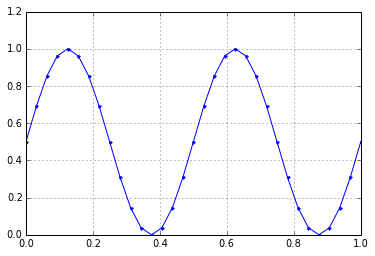

In [195]:
plot(thetas/(2*pi),intensity,'.-')
grid(True)